In [1]:
#importing libraries 

import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt

In [2]:

#importing the dataset and reading it as a dataframe
our_data = pd.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294342-2873/diabetes.csv")  

our_data.head(10) #showing the first 10 rows of the data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
print("The sample size = ", len(our_data)) #print the dataset sample size


The sample size =  768


In [5]:
#drop any missing values in the 2 columns of Glucose & BMI

clean_data = our_data.dropna(subset = ['Glucose', 'BMI'])


#check if there were any missing values

if len(clean_data) == len(our_data):
    
    #if there were no missing values , further invistigation will depend on "our_data"
    print ("there are no missing values corresponding to Glucose Concentrations or BMI")
    
    
else:
    
    # if there were missing values, further invistigation will depend on "clean_data" as "our_data"
    print("clean dataset sample size = ", len(clean_data))
    our_data = clean_data

there are no missing values corresponding to Glucose Concentrations or BMI


In [6]:
#get descriptive stats for the 2 variables

our_data.loc[:,['Glucose', 'BMI']].describe()

,Glucose,BMI
count,768.000000,768.000000
mean,120.894531,31.992578
std,31.972618,7.884160
min,0.000000,0.000000
25%,99.000000,27.300000
50%,117.000000,32.000000
75%,140.250000,36.600000
max,199.000000,67.100000


In [7]:
#get descriptive stats of interest to any variable 

#define the function returing a table of the useful descriptive stats
def descriptive_stats(variable): 
    
    count = len(variable) #sample size
    mean = np.mean(variable)  #sample mean
    median = np.median (variable)  # sample median
    mode = statistics.mode (variable)  #sample mode
    std = np.std (variable, ddof = 1)  #sample standard deviation
    the_range = max(variable) - min(variable)  #sample range
    
    
    #create a table of the descriptive statistics
   
    descriptive_statistics = {
        'count': [count],
        'mean': [round(mean, 3)],   
        'median': [round (median, 3)],
        'mode': [round (mode, 3)],
        'range': [round(the_range, 3)],
        'sample std': [round(std, 3)],
    
    }
    our_table = pd.DataFrame(data= descriptive_statistics)
    return our_table

In [8]:
#get descriptive stats for the independent variable

descriptive_stats(our_data['BMI'])

,count,mean,median,mode,range,sample std
0,768,31.993,32.0,32.0,67.1,7.884


In [9]:
#get descriptive stats for the dependent variable

descriptive_stats(our_data['Glucose'])

,count,mean,median,mode,range,sample std
0,768,120.895,117.0,100,199,31.973


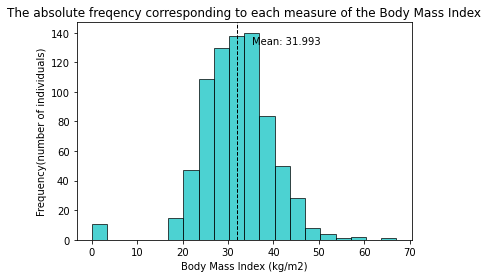

In [23]:
#histogram for the body mass index BMI


plt.hist(our_data['BMI'], bins = 20, color='c', edgecolor='k', alpha=0.7 )
  
plt.xlabel('Body Mass Index (kg/m2)')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(our_data['BMI'].mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(our_data['BMI'].mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(our_data['BMI'].mean()))

plt.title('The absolute freqency corresponding to each measure of the Body Mass Index')
plt.show()



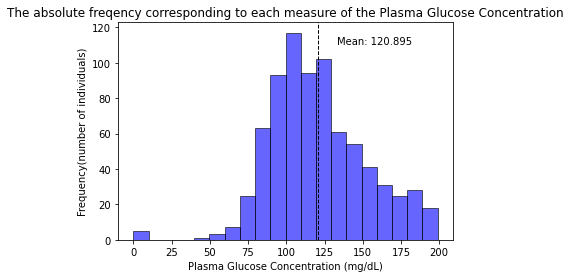

In [29]:
#histogram for the Glucose concentration

plt.hist(our_data['Glucose'], bins = 20, color='b', edgecolor='k', alpha=0.6 )
  
plt.xlabel('Plasma Glucose Concentration (mg/dL)')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(our_data['Glucose'].mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(our_data['Glucose'].mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(our_data['Glucose'].mean()))

plt.title('The absolute freqency corresponding to each measure of the Plasma Glucose Concentration')
plt.show()

In [112]:
#Glucose levels corresponding to normal BMI [18.5 , 25) 


normal_corr_Glucose = our_data['Glucose'][(our_data['BMI'] >= 18.5) & (our_data['BMI'] < 25)]   

#convert to list 
normal_corr_Glucose_list = normal_corr_Glucose.tolist()


#getting descriptive stats

normal_corr_Glucose.describe()



count    102.000000
mean     107.980392
std       27.335097
min        0.000000
25%       94.000000
50%      103.000000
75%      119.750000
max      194.000000
Name: Glucose, dtype: float64

In [113]:
#Glucose levels corresponding to high BMI >= 25 


high_corr_Glucose = our_data['Glucose'][our_data['BMI'] >= 25]   

#convert to list 
high_corr_Glucose_list = high_corr_Glucose.tolist()

#getting descriptive stats

high_corr_Glucose.describe()

count    651.000000
mean     123.356375
std       32.293732
min        0.000000
25%      100.000000
50%      120.000000
75%      144.000000
max      199.000000
Name: Glucose, dtype: float64

In [114]:
#get descriptive stats for the dependent variable corresponding to normal BMI subgroup
descriptive_stats(normal_corr_Glucose)

,count,mean,median,mode,range,sample std
0,102,107.98,103.0,101,194,27.335


In [115]:
#get descriptive stats for the dependent variable corresponding to high BMI subgroup
descriptive_stats(high_corr_Glucose)

,count,mean,median,mode,range,sample std
0,651,123.356,120.0,100,199,32.294


In [116]:
def calculate_mean(variable_list):
    
    return sum(variable_list)/ len(variable_list)



In [117]:
#mean 
calculate_mean(normal_corr_Glucose_list)

107.98039215686275

In [118]:
#mean
calculate_mean(high_corr_Glucose_list)

123.3563748079877

In [119]:
#function to get the sample standard deviation
def sample_std(variable):
    
    #apply the formula for the standard deviation -->. sqrt[{sum(x-mean)^2}/N-1]
    distance_from_mean = variable - calculate_mean(variable.tolist())
    sq_distance_from_mean = distance_from_mean ** 2
    sum_sq_distance = sum(sq_distance_from_mean)
    variance = sum_sq_distance / (len(variable)-1) # for sample 
    # (len(our_data['Glucose'])) for population 
    return variance ** (1/2)

In [120]:
#standard deviation
sample_std(normal_corr_Glucose)

27.335097082651043

In [121]:
#standard deviation
sample_std(high_corr_Glucose)

32.29373173387218

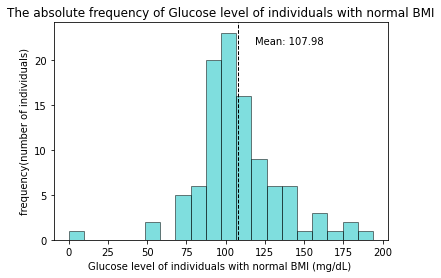

In [122]:
#histogram for the dependent variable corresponding to normal BMI subgroup


plt.hist(normal_corr_Glucose, bins = 20, color='c', edgecolor='k', alpha=0.5 )
  
    
plt.xlabel('Glucose level of individuals with normal BMI (mg/dL) ')
plt.ylabel('frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(normal_corr_Glucose.mean(), color='k', linestyle='dashed', linewidth=1)

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(normal_corr_Glucose.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(normal_corr_Glucose.mean()))

plt.title('The absolute frequency of Glucose level of individuals with normal BMI')
plt.show()

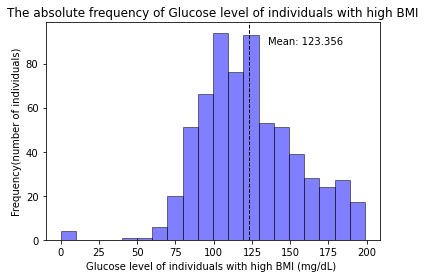

In [123]:
#histogram for the dependent variable corresponding to high BMI subgroup


plt.hist(high_corr_Glucose, bins = 20, color='b', edgecolor='k', alpha=0.5 )
  
plt.xlabel('Glucose level of individuals with high BMI (mg/dL) ')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(high_corr_Glucose.mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(high_corr_Glucose.mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(high_corr_Glucose.mean()))

plt.title('The absolute frequency of Glucose level of individuals with high BMI')
plt.show()

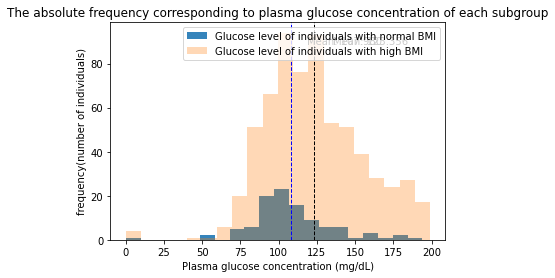

In [124]:
#histogram combined
plt.hist(normal_corr_Glucose, bins = 20 , label='Glucose level of individuals with normal BMI' , alpha = 0.9)
plt.hist(high_corr_Glucose, bins = 20 , label= 'Glucose level of individuals with high BMI' , alpha = 0.3)
plt.xlabel('Plasma glucose concentration (mg/dL)')
plt.ylabel('frequency(number of individuals)')

#plotting the line representing the mean -first group
plt.axvline(normal_corr_Glucose.mean(), color='b', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(normal_corr_Glucose.mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(normal_corr_Glucose.mean()))

#plotting the line representing the mean -second group
plt.axvline(high_corr_Glucose.mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(high_corr_Glucose.mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(high_corr_Glucose.mean()))

plt.title('The absolute frequency corresponding to plasma glucose concentration of each subgroup')
plt.legend(loc = 'best')
plt.show()

Appendix C

This is just for ensuring the conditions of inference are met, especially the independence condition 


In [69]:
#check the sample observations are independent

pop_size = 10070       #population size

def is_independent(sample, population):
    
    #sample size
    n = len(sample)
    
    #ratio of the sample size to the population size
    ratio = n / population
    
    if ratio <= 0.1:
        
        print ("Since the the sample size represents ", round (ratio , 3)*100 , " % of the population, it's independent")
        return True
    else:
        
        print ("Since the the sample size represents ", round (ratio , 3)*100 , " % of the population, it's not independent")
        return False


In [70]:
#check the sample size for the first subgroup
is_independent(normal_corr_Glucose,pop_size)

Since the the sample size represents  1.0  % of the population, it's independent


True

In [71]:
#check the sample size for the second subgroup
is_independent(high_corr_Glucose,pop_size)

Since the the sample size represents  6.5  % of the population, it's independent


True

In [87]:

#define a function to calculate the significance and the power 
#the function parameters are the samples, number of tails, significance level & population size

def diff_of_means(sample1,sample2,tails, alpha, N):  
    
    #2 sample sizes
    n1 = len(sample1)
    n2 = len(sample2)
    
    #2 samples means
    x1 = np.mean(sample1)
    x2 = np.mean(sample2)

    #2 samples standard deviation
    s1 = np.std(sample1, ddof =1)        #Bassel's correction applied
    s2 = np.std(sample2, ddof =1)

    # the finite population correction factor for either of 2 samples    
    fpcf1 = np.sqrt((N - n1)/(N - 1))
    fpcf2 = np.sqrt((N - n2)/(N - 1))
      
    
   
 #checking when to apply the correction factor 
    
    if is_independent(sample1,N) and is_independent(sample2,N):   #2 samples are independent 
        
        # calculate the standard error for the statistical significance
        standard_error =  np.sqrt((s1**2/n1) + (s2**2/n2))   # no need for correction
        
        #calculate the pooled standard deviation for the practical significance
        sd_pooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))
        
    elif is_independent(sample1,pop_size):  # only sample 1 is independent
        
        standard_error =  np.sqrt((s1**2/n1) + (s2**2/n2) *fpcf2)  #correct for sample 2
        sd_pooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1)* fpcf2)/(n1+n2-2))
        
    elif is_independent(sample2,pop_size):    #only sample 2 is independent
        standard_error =  np.sqrt((s1**2/n1)* fpcf1 + (s2**2/n2))  #correct for sample 1
        sd_pooled = np.sqrt((s1**2*(n1-1)* fpcf1 + s2**2*(n2-1) )/(n1+n2-2))
        
    else:   #none is independent
        standard_error =  np.sqrt((s1**2/n1)* fpcf1 + (s2**2/n2)* fpcf2)  #correct for both
        sd_pooled = np.sqrt((s1**2*(n1-1)* fpcf1 + s2**2*(n2-1)* fpcf2)/(n1+n2-2))
        
    standard_error =  np.sqrt((s1**2/n1) + (s2**2/n2))
    sd_pooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))
        
 


    # calculate the t score in the distribution of the difference of the 2 means
    t_score = np.abs(x2-x1)/standard_error
        
    print('t-score =', t_score)
    
    
    #get the degrees of freedom
    df = min(n1-1, n2-1)
    
    
    #Calculate the p-value (statistical significance)
    percentile = stats.t.cdf(t_score,df)
    p_value = 1- percentile
    
    print('p =',p_value) 
    
    
    #practical significance
    cohens_d = (x2-x1)/sd_pooled
    hedges_g = cohens_d * (1-(3/(4*(n1+n2)-9)))
    
    
    #the upward bias resulted by Cohen's d
    upward_bias = cohens_d - hedges_g

    
    print('d =',cohens_d) 
    print('g =',hedges_g)
    print ('upward bias =', round(upward_bias*100, 3) , '%')
    
    
    

#calculating power

    
    t_null= stats.t.ppf(1- alpha, df) #t score in the null hypothesis distribution
    
    threshold = t_null * standard_error  #the value of the mean separating bet. rejection or failing to reject the null
    
    t_alter = ( np.abs(x1-x2 - threshold))/ standard_error  #t score in the alternative hypothesis distribution
     
    power = stats.t.cdf(t_alter,df)     
   
    print ("Power =", round (power*100, 7) , "%")
 
diff_of_means(normal_corr_Glucose, high_corr_Glucose, 1, 0.1, 10070)



Since the the sample size represents  1.0  % of the population, it's independent
Since the the sample size represents  6.5  % of the population, it's independent
t-score = 5.14608581565513
p = 6.563220680266824e-07
d = 0.48547446182832343
g = 0.4849894723559675
upward bias = 0.048 %
Power = 99.9999998 %


In [91]:
#conficence interval for the difference of the 2 means


# working backward
# conf needs the mean itself and the margin of error 
# so, mean depending on the dataset
#margin of error needs the t-score and SE
# t-score which needs the null mean and the 


def conf_interval(sample1, sample2, conf_level, N ):
    
    
    #2 sample sizes
    n1 = len(sample1)
    n2 = len(sample2)
    
    
    #2 samples means
    x1 = np.mean(sample1)
    x2 = np.mean(sample2)

    #2 samples standard deviation
    s1 = np.std(sample1, ddof =1)
    s2 = np.std(sample2, ddof =1)
    
    
    #checking whan to apply the correction factor 
    
    if n1/ N > 0.1 and n2 / N > 0.1:
        
        # calculate the standard error 
        SE =  np.sqrt((s1**2/n1)*fpcf1 + (s2**2/n2)*fpcf2)
 
    elif n1/ N > 0.1: 
        
        SE =  np.sqrt((s1**2/n1)*fpcf1 + (s2**2/n2))
        
    elif n2/ N > 0.1: 
        
        SE =  np.sqrt((s1**2/n1)+ (s2**2/n2)*fpcf2)
      
    else:
        SE =  np.sqrt((s1**2/n1) + (s2**2/n2))
        
      
  
    #get the degrees of freedom
    df = min(n1-1, n2-1)

    
    #calculate the t score corresponding to the confidence level
    t =  stats.t.ppf((conf_level + (1-conf_level)/2),df) 
    
   
    #calculate the margin of error
    ME = t * SE
    
    lower_bound = round(np.abs(x2-x1) - ME, 2)
    higher_bound = round(np.abs(x2-x1) + ME, 2)

    print ("confidence interval of difference of the means = [", lower_bound, ",", higher_bound, "]" )

  
conf_interval(normal_corr_Glucose, high_corr_Glucose, 0.95, 10070) 

confidence interval of difference of the means = [ 9.45 , 21.3 ]


In [92]:
#confidence interval for each subgroup

def confidence_interval(sample, conf_level):
    
    #degrees of freedom
    df = len(sample) -1
    
    #t score corresponding to the confidence level
    t =  stats.t.ppf((conf_level + (1-conf_level)/2),df) 
    
    #the mean of glucose values
    mean = np.mean(sample)
    
    #the sample standard deviation
    std = np.std(sample, ddof =1)
    
    #the standard error 
    SE = std / len(sample) **.5
    
    #the argin of error
    ME = t * SE
    
    lower_bound = round(mean - ME, 2)
    higher_bound = round(mean + ME, 2)
    
    print ("conf interval= [", lower_bound, ",", higher_bound, "]" )
    
    
    
confidence_interval(normal_corr_Glucose, 0.95)
confidence_interval(high_corr_Glucose, 0.95)

conf interval= [ 102.61 , 113.35 ]
conf interval= [ 120.87 , 125.84 ]
